## Cluster analysis


=== Cek mapping untuk sheet: Monthly_Fixed_clustered ===
   BusinessType       BusinessTypeName
0            99                 Others
1             3  Fashion & Accessories
2             2        Health & Beauty
3            99                 Others
4            99                 Others


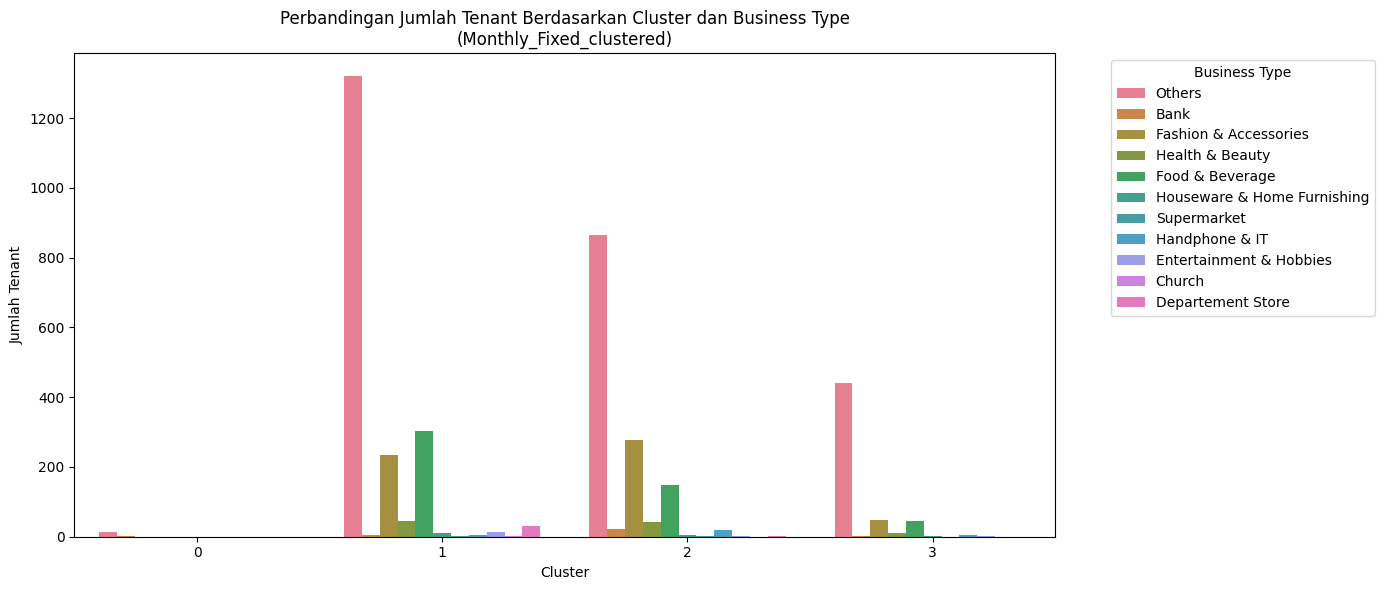

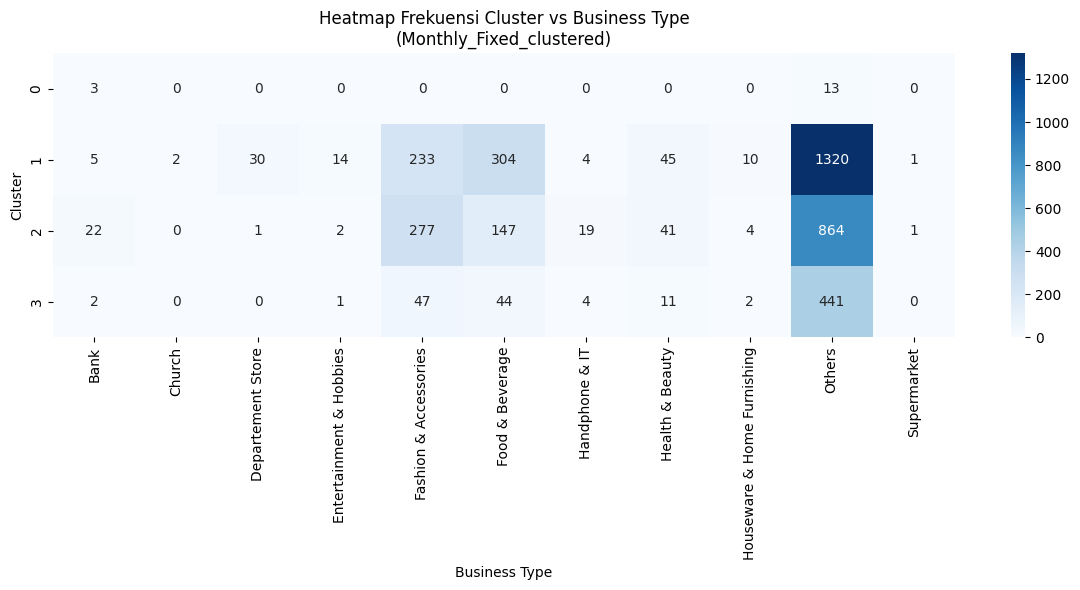


=== Cek mapping untuk sheet: Daily_Fixed_clustered ===
   BusinessType BusinessTypeName
0            99           Others
1            99           Others
2            99           Others
3            99           Others
4            99           Others


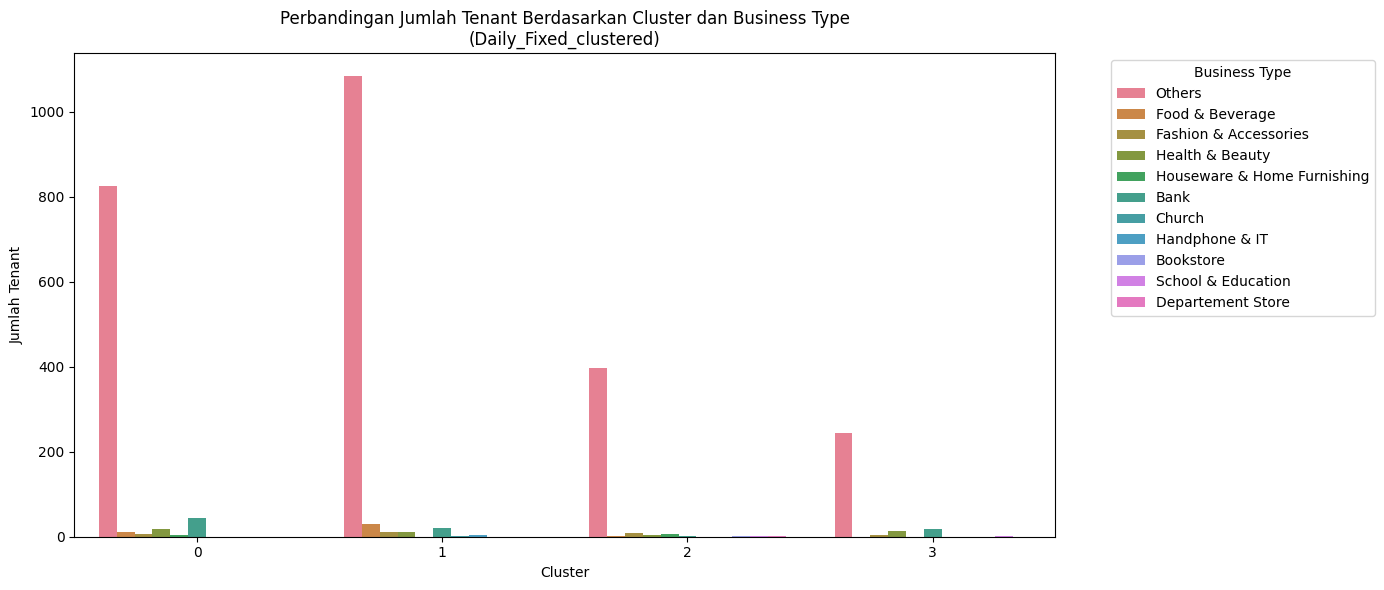

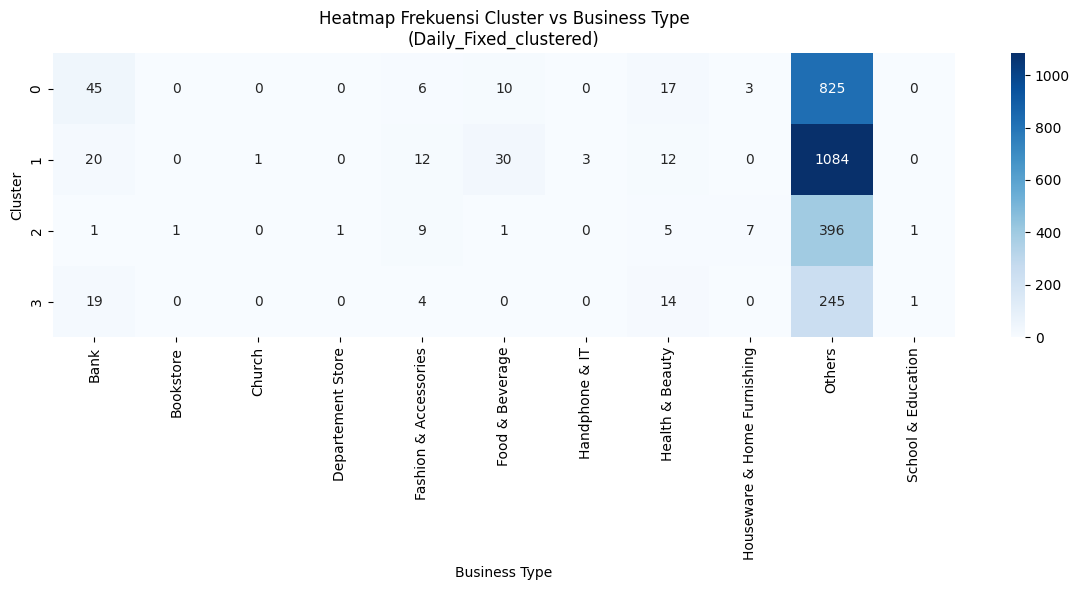

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Path file
file_path = "D:/DATA SKRIPSI/kontrak_sewa_bersih_clustered.xlsx"

# 2. Mapping BusinessType
mapping = {
    1: "Food & Beverage",
    2: "Health & Beauty",
    3: "Fashion & Accessories",
    4: "Entertainment & Hobbies",
    5: "Departement Store",
    6: "Supermarket",
    7: "Bookstore",
    8: "Houseware & Home Furnishing",
    9: "Handphone & IT",
    10: "Church",
    11: "Bank",
    12: "School & Education",
    99: "Others"
}

def plot_cluster_business_type(sheet_name):
    # 3. Load data per sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    # Pastikan BusinessType berupa integer dan mapping ke nama
    df["BusinessType"] = df["BusinessType"].astype(int)
    df["BusinessTypeName"] = df["BusinessType"].map(mapping)

    print(f"\n=== Cek mapping untuk sheet: {sheet_name} ===")
    print(df[["BusinessType", "BusinessTypeName"]].head())

    # 4. Countplot Cluster vs BusinessType
    plt.figure(figsize=(14, 6))
    sns.countplot(data=df, x="cluster", hue="BusinessTypeName")
    plt.title(f"Perbandingan Jumlah Tenant Berdasarkan Cluster dan Business Type\n({sheet_name})")
    plt.xlabel("Cluster")
    plt.ylabel("Jumlah Tenant")
    plt.legend(title="Business Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # 5. Heatmap
    pivot = pd.crosstab(df["cluster"], df["BusinessTypeName"])

    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Heatmap Frekuensi Cluster vs Business Type\n({sheet_name})")
    plt.xlabel("Business Type")
    plt.ylabel("Cluster")
    plt.tight_layout()
    plt.show()

# Panggil untuk kedua sheet yang diminta
plot_cluster_business_type("Monthly_Fixed_clustered")
plot_cluster_business_type("Daily_Fixed_clustered")



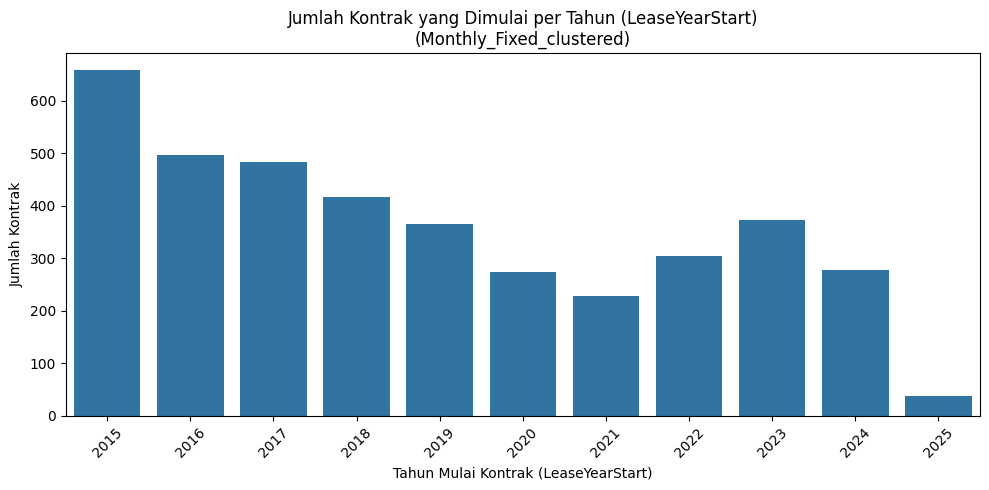

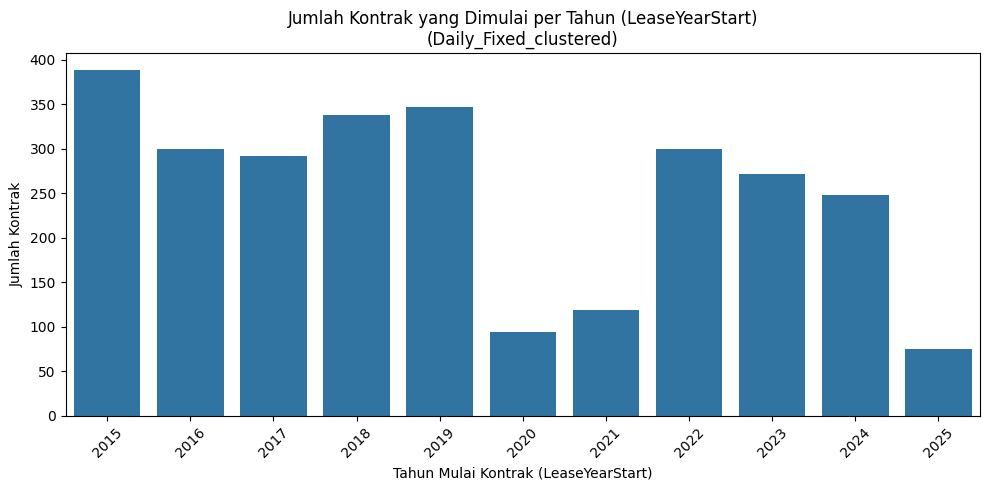

In [ ]:
def plot_lease_year_start(sheet_name):
    # Load data
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    year_counts = df["LeaseYearStart"].value_counts().sort_index()

    # Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=year_counts.index, y=year_counts.values)
    plt.title(f"Jumlah Kontrak yang Dimulai per Tahun (LeaseYearStart)\n({sheet_name})")
    plt.xlabel("Tahun Mulai Kontrak (LeaseYearStart)")
    plt.ylabel("Jumlah Kontrak")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Panggil grafik jumlah kontrak per tahun
plot_lease_year_start("Monthly_Fixed_clustered")
plot_lease_year_start("Daily_Fixed_clustered")

## Prediction chart

Monthly head:
   cluster  CuryUnitPrice       oof_pred
0        1  150000.000000  119879.308403
1        1  110570.544007   74129.514716
2        2  411875.000000  589166.895823
3        1   20000.000000  146237.908616
4        1   45000.000000   13829.711623

Daily head:
   cluster  CuryUnitPrice      oof_pred
0        0      21428.575  32405.965045
1        1      26785.715  28999.063198
2        2      68181.820  54019.042049
3        2      68181.820  59880.999609
4        2      68181.820  57783.886245


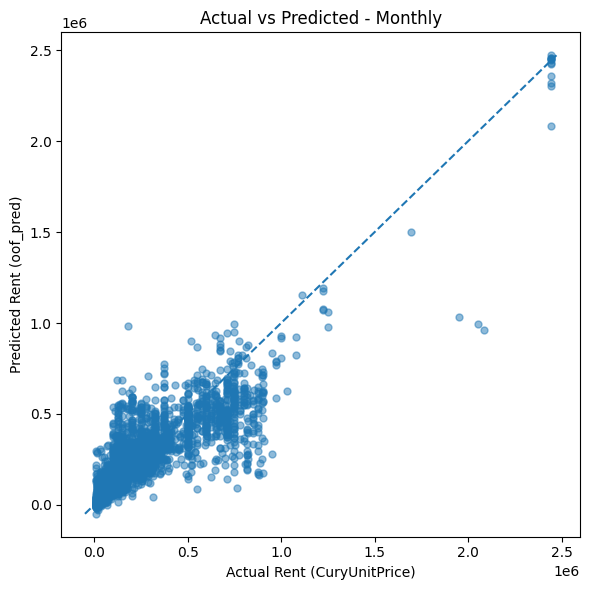

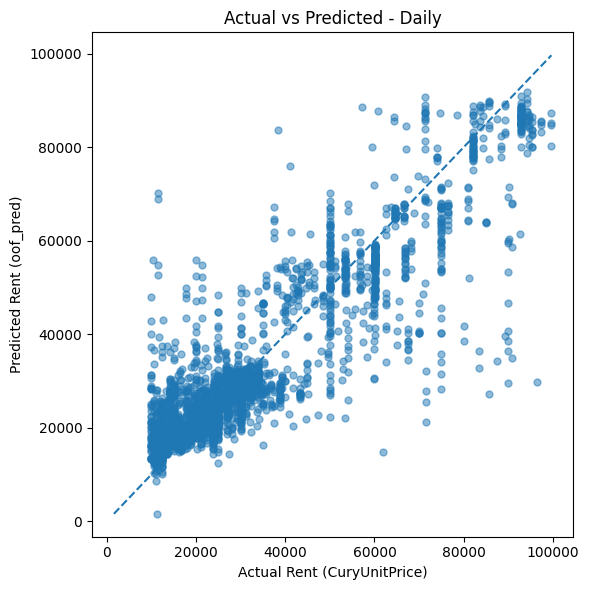

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# -
# 1. BACA DATA
# -
# Sekarang 1 file, 2 sheet: "Monthly" dan "Daily"
oof_path = Path("catboost_oof_pred_without_cluster_feature.xlsx")

df_monthly = pd.read_excel(oof_path, sheet_name="Monthly")
df_daily   = pd.read_excel(oof_path, sheet_name="Daily")

# Cek beberapa baris untuk memastikan nama kolom
print("Monthly head:")
print(df_monthly.head())
print("\nDaily head:")
print(df_daily.head())

# Saya anggap kolom-kolomnya:
# 'cluster', 'CuryUnitPrice' (actual), 'Inflation', 'GDP_Growth', 'oof_pred' (prediksi)
actual_col  = "CuryUnitPrice"
pred_col    = "oof_pred"

# Tambahkan kolom periode untuk memudahkan gabungan
df_monthly["period"] = "Monthly"
df_daily["period"]   = "Daily"

# Gabungkan (opsional, untuk beberapa visual)
df_all = pd.concat([df_monthly, df_daily], ignore_index=True)

# -
# SCATTERPLOT TANPA CLUSTER
# -
def scatter_actual_vs_pred_simple(df, period_label):
    plt.figure(figsize=(6, 6))
    plt.scatter(
        df[actual_col],
        df[pred_col],
        alpha=0.5,
        s=25
    )

    # garis referensi y=x
    lo = min(df[actual_col].min(), df[pred_col].min())
    hi = max(df[actual_col].max(), df[pred_col].max())
    plt.plot([lo, hi], [lo, hi], linestyle="--")

    plt.xlabel("Actual Rent (CuryUnitPrice)")
    plt.ylabel("Predicted Rent (oof_pred)")
    plt.title(f"Actual vs Predicted - {period_label}")
    plt.tight_layout()
    plt.show()

# panggil scatter plot
scatter_actual_vs_pred_simple(df_monthly, "Monthly")
scatter_actual_vs_pred_simple(df_daily, "Daily")




Monthly head:
  LeaseStartDate LeaseEndDate Building          UnitID UnitNum  BusinessType  \
0     2015-01-01   2015-04-30      0PW  0PW000UG000039  000039            99   
1     2015-01-01   2015-01-31      0PW  0PW00004000073  000073            99   
2     2015-01-01   2015-12-31      0PE  0PE00K02000003  000003            99   
3     2015-01-01   2015-06-30      0PE  0PE00KLG000018  000018            99   
4     2015-01-01   2016-03-03      0PE  0PEATN04000001  000001            99   

     ContractType ContractPeriod  CuryUnitPrice  oof_pred  fold  abs_error  \
0         Leasing        Monthly       250000.0       0.0     0   250000.0   
1         Leasing        Monthly       160000.0       0.0     0   160000.0   
2  Casual Leasing        Monthly        20000.0       0.0     0    20000.0   
3  Casual Leasing        Monthly       250000.0       0.0     0   250000.0   
4         Leasing        Monthly       168000.0       0.0     0   168000.0   

     ape  
0  100.0  
1  100.0  
2  

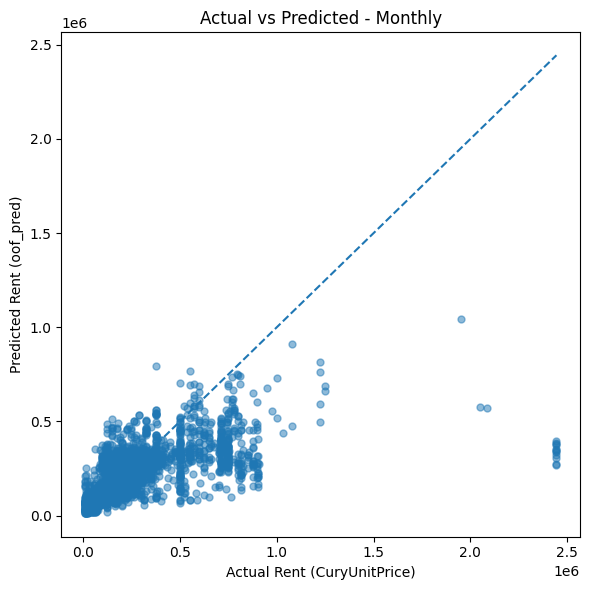

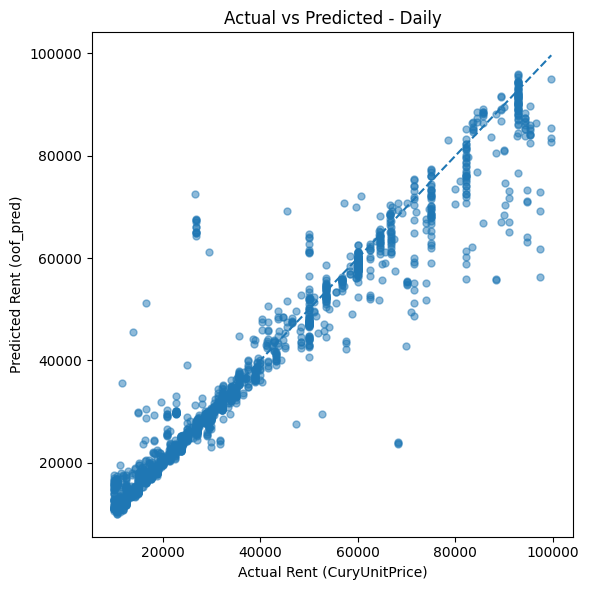

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# -
# 1. BACA DATA
# -
oof_path = Path("hasil_catboost_oof_pred.xlsx")

df_monthly = pd.read_excel(oof_path, sheet_name="Monthly_Fixed")
df_daily   = pd.read_excel(oof_path, sheet_name="Daily_Fixed")

# Cek beberapa baris
print("Monthly head:")
print(df_monthly.head())
print("\nDaily head:")
print(df_daily.head())

# Kolom penting
actual_col  = "CuryUnitPrice"
pred_col    = "oof_pred"

df_monthly["period"] = "Monthly"
df_daily["period"]   = "Daily"

# -
# FILTER DATA (hapus baris prediksi nol)
# -
df_monthly_clean = df_monthly[df_monthly[pred_col] != 0].copy()
df_daily_clean   = df_daily[df_daily[pred_col] != 0].copy()

print("\nJumlah data monthly sebelum:", len(df_monthly))
print("Jumlah data monthly sesudah :", len(df_monthly_clean))
print("Jumlah data daily sebelum  :", len(df_daily))
print("Jumlah data daily sesudah  :", len(df_daily_clean))

# -
# SCATTERPLOT TANPA CLUSTER
# -
def scatter_actual_vs_pred_simple(df, period_label):
    plt.figure(figsize=(6, 6))
    plt.scatter(
        df[actual_col],
        df[pred_col],
        alpha=0.5,
        s=25
    )

    # garis referensi y = x
    lo = min(df[actual_col].min(), df[pred_col].min())
    hi = max(df[actual_col].max(), df[pred_col].max())
    plt.plot([lo, hi], [lo, hi], linestyle="--")

    plt.xlabel("Actual Rent (CuryUnitPrice)")
    plt.ylabel("Predicted Rent (oof_pred)")
    plt.title(f"Actual vs Predicted - {period_label}")
    plt.tight_layout()
    plt.show()

# panggil scatter plot
scatter_actual_vs_pred_simple(df_monthly_clean, "Monthly")
scatter_actual_vs_pred_simple(df_daily_clean, "Daily")


Monthly head:
   cluster  CuryUnitPrice  Inflation  GDP_Growth       oof_pred  RowID
0        1  150000.000000       1.21         NaN  150289.133850      1
1        1  110570.544007       1.21         NaN   81247.839621      2
2        2  411875.000000       1.21         NaN  281245.324862      3
3        1   20000.000000       0.44        5.76   87482.886590      4
4        1   45000.000000       0.44        5.76   46304.967323      5

Daily head:
   cluster  CuryUnitPrice  Inflation  GDP_Growth   oof_pred  RowID
0        1      21428.575       0.06        6.00        NaN      1
1        3      26785.715      -0.11        6.00        NaN      2
2        0      68181.820       0.07        6.51  58364.251      3
3        0      68181.820       0.07        6.51  58364.251      4
4        0      68181.820       0.07        6.51  58364.251      5


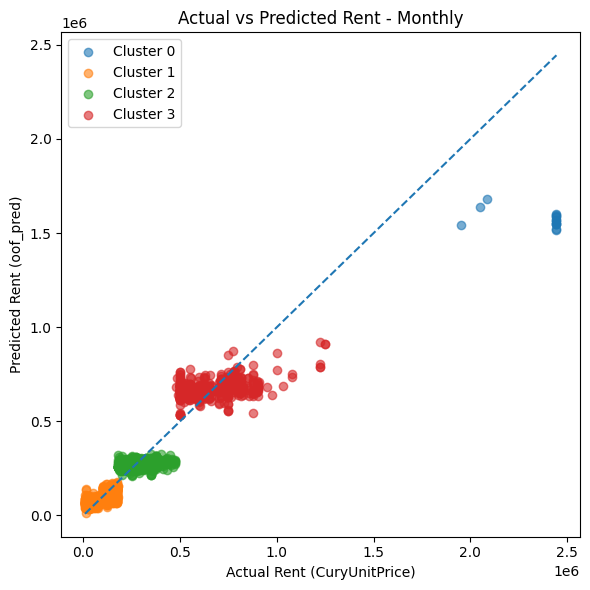

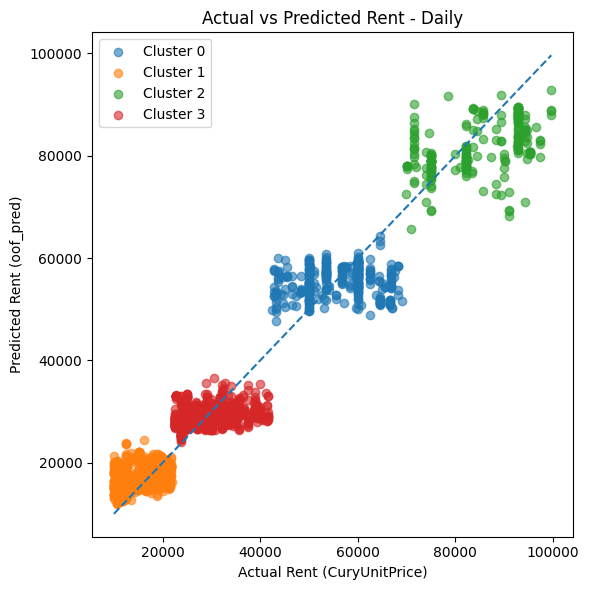


[Monthly] Clusters ditemukan: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Cluster 0: jumlah data = 15
Cluster 1: jumlah data = 1686
Cluster 2: jumlah data = 1109
Cluster 3: jumlah data = 450


C:\Users\HP\AppData\Local\Temp\ipykernel_35708\1065788689.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


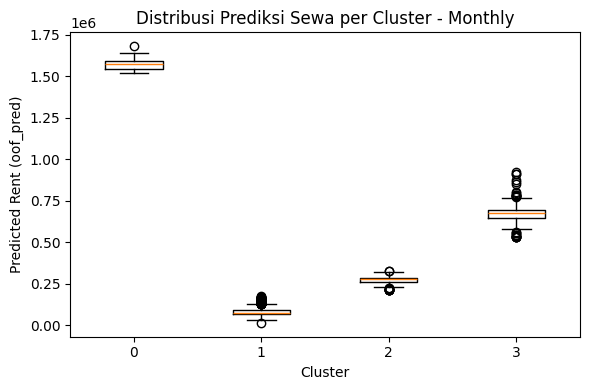


[Daily] Clusters ditemukan: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Cluster 0: jumlah data = 360
Cluster 1: jumlah data = 763
Cluster 2: jumlah data = 237
Cluster 3: jumlah data = 950


C:\Users\HP\AppData\Local\Temp\ipykernel_35708\1065788689.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


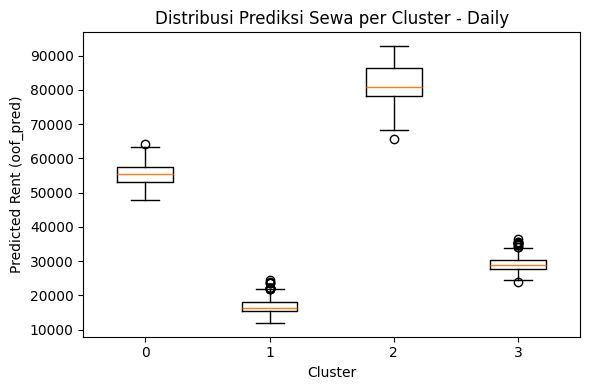

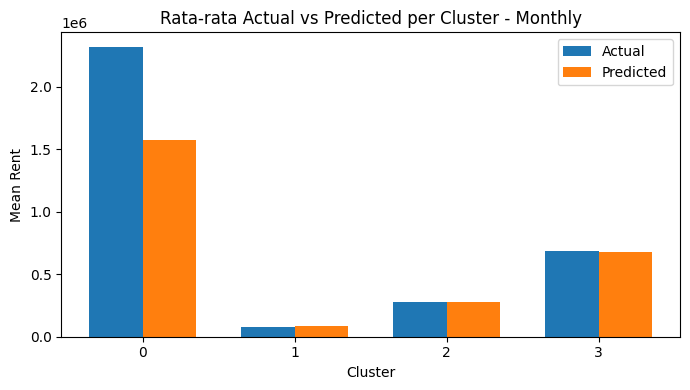

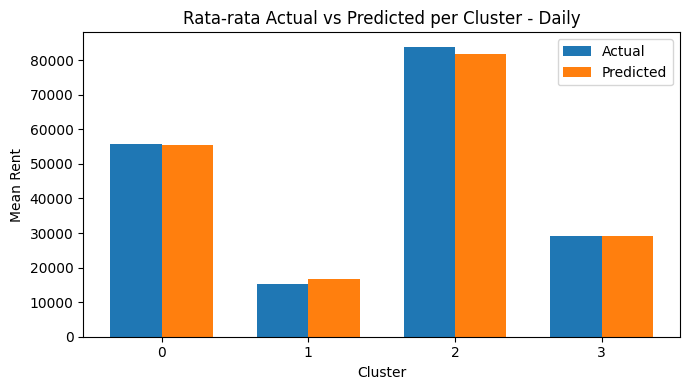


Ringkasan error:
    period     abs_error       ape
0    Daily   4149.211915  0.155231
1  Monthly  48755.643002  0.484941


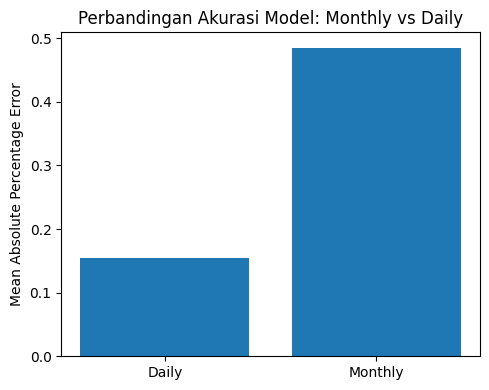

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


# 1. BACA DATA
oof_path = Path("catboost_oof_pred_with_cluster_walkforward.xlsx")

df_monthly = pd.read_excel(oof_path, sheet_name="Monthly")
df_daily   = pd.read_excel(oof_path, sheet_name="Daily")

# Cek beberapa baris untuk memastikan nama kolom
print("Monthly head:")
print(df_monthly.head())
print("\nDaily head:")
print(df_daily.head())

# Saya anggap kolom-kolomnya:
# 'cluster', 'CuryUnitPrice' (actual), 'Inflation', 'GDP_Growth', 'oof_pred' (prediksi)
actual_col  = "CuryUnitPrice"
pred_col    = "oof_pred"
cluster_col = "cluster"

# Tambahkan kolom periode untuk memudahkan gabungan
df_monthly["period"] = "Monthly"
df_daily["period"]   = "Daily"

# Gabungkan (opsional, untuk beberapa visual)
df_all = pd.concat([df_monthly, df_daily], ignore_index=True)

# -
# 2. SCATTER PLOT ACTUAL vs PREDICTED per PERIODE
# -
def scatter_actual_vs_pred(df, period_label):
    plt.figure(figsize=(6, 6))
    # loop per cluster agar bisa dibedakan di legend
    for cl in sorted(df[cluster_col].dropna().unique()):
        sub = df[df[cluster_col] == cl]
        plt.scatter(sub[actual_col], sub[pred_col], alpha=0.6, label=f"Cluster {cl}")
    # garis y = x sebagai referensi
    lo = min(df[actual_col].min(), df[pred_col].min())
    hi = max(df[actual_col].max(), df[pred_col].max())
    plt.plot([lo, hi], [lo, hi], linestyle="--")
    plt.xlabel("Actual Rent (CuryUnitPrice)")
    plt.ylabel("Predicted Rent (oof_pred)")
    plt.title(f"Actual vs Predicted Rent - {period_label}")
    plt.legend()
    plt.tight_layout()
    plt.show()

scatter_actual_vs_pred(df_monthly, "Monthly")
scatter_actual_vs_pred(df_daily, "Daily")

# -
# 3. BOXPLOT PREDIKSI per CLUSTER per PERIODE
# -
def boxplot_pred_per_cluster(df, period_label):
    # buang baris yang prediksinya NaN
    df = df.dropna(subset=[pred_col]).copy()

    clusters = sorted(df[cluster_col].dropna().unique())
    print(f"\n[{period_label}] Clusters ditemukan:", clusters)

    data = []
    labels = []
    for c in clusters:
        series = df.loc[df[cluster_col] == c, pred_col].dropna()
        print(f"Cluster {c}: jumlah data = {len(series)}")  # debug
        if len(series) > 0:
            data.append(series.values)
            labels.append(str(c))

    if not data:
        print("Semua cluster kosong / NaN, tidak bisa buat boxplot.")
        return

    plt.figure(figsize=(6, 4))
    # catatan: untuk matplotlib, param yang benar adalah 'labels', bukan 'tick_labels'
    plt.boxplot(data, labels=labels, showfliers=True)
    plt.xlabel("Cluster")
    plt.ylabel(f"Predicted Rent ({pred_col})")
    plt.title(f"Distribusi Prediksi Sewa per Cluster - {period_label}")
    plt.tight_layout()
    plt.show()

boxplot_pred_per_cluster(df_monthly, "Monthly")
boxplot_pred_per_cluster(df_daily, "Daily")

# -
# 4. BAR CHART RATA-RATA ACTUAL & PREDIKSI per CLUSTER per PERIODE
# -
def bar_mean_actual_pred_per_cluster(df, period_label):
    grouped = (
        df.groupby(cluster_col)[[actual_col, pred_col]]
        .mean(numeric_only=True)
        .reset_index()
        .sort_values(cluster_col)
    )

    x = range(len(grouped))
    width = 0.35

    plt.figure(figsize=(7, 4))
    plt.bar([i - width/2 for i in x], grouped[actual_col], width=width, label="Actual")
    plt.bar([i + width/2 for i in x], grouped[pred_col],   width=width, label="Predicted")
    plt.xticks(x, grouped[cluster_col].astype(str))
    plt.xlabel("Cluster")
    plt.ylabel("Mean Rent")
    plt.title(f"Rata-rata Actual vs Predicted per Cluster - {period_label}")
    plt.legend()
    plt.tight_layout()
    plt.show()

bar_mean_actual_pred_per_cluster(df_monthly, "Monthly")
bar_mean_actual_pred_per_cluster(df_daily, "Daily")

# -
# 5. BANDINGKAN ERROR ANTARA MONTHLY vs DAILY
# -
for df in (df_monthly, df_daily):
    df["abs_error"] = (df[pred_col] - df[actual_col]).abs()
    df["ape"] = df["abs_error"] / df[actual_col]  # absolute percentage error

# gabungkan SETELAH kolom error dibuat
df_monthly["period"] = "Monthly"
df_daily["period"]   = "Daily"
df_all = pd.concat([df_monthly, df_daily], ignore_index=True)

error_summary = (
    df_all.groupby("period")[["abs_error", "ape"]]
    .mean(numeric_only=True)
    .reset_index()
)

print("\nRingkasan error:")
print(error_summary)

plt.figure(figsize=(5, 4))
plt.bar(error_summary["period"], error_summary["ape"])
plt.ylabel("Mean Absolute Percentage Error")
plt.title("Perbandingan Akurasi Model: Monthly vs Daily")
plt.tight_layout()
plt.show()


In [6]:
print(df_monthly[cluster_col].unique())
print(df_monthly[pred_col].head())


[0 3 1 2]
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: oof_pred, dtype: float64


Monthly head:
   cluster  CuryUnitPrice  Inflation  GDP_Growth       oof_pred
0        1  150000.000000       1.21         NaN  144415.416255
1        1  110570.544007       1.21         NaN   39059.033739
2        2  411875.000000       1.21         NaN  303392.918374
3        1   20000.000000       0.44        5.76   42383.181619
4        1   45000.000000       0.44        5.76   31242.053061

Daily head:
   cluster  CuryUnitPrice  Inflation  GDP_Growth      oof_pred
0        0      21428.575       0.06        6.00  20783.056992
1        1      26785.715      -0.11        6.00  34976.488500
2        2      68181.820       0.07        6.51  62964.421514
3        2      68181.820       0.07        6.51  62412.942691
4        2      68181.820       0.07        6.51  66210.126482


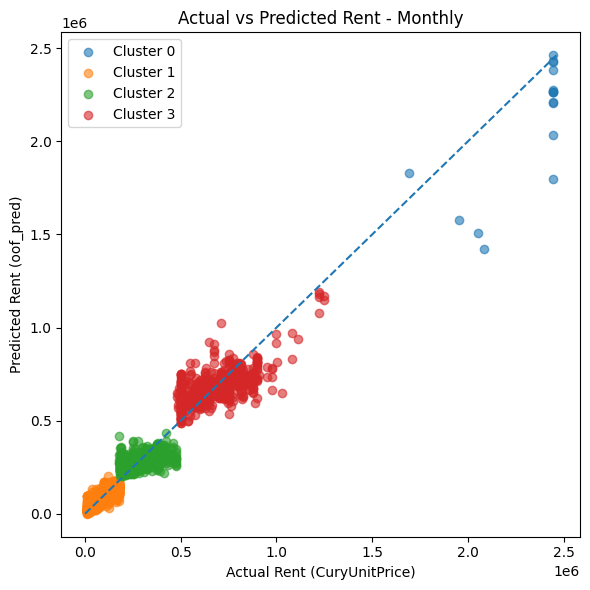

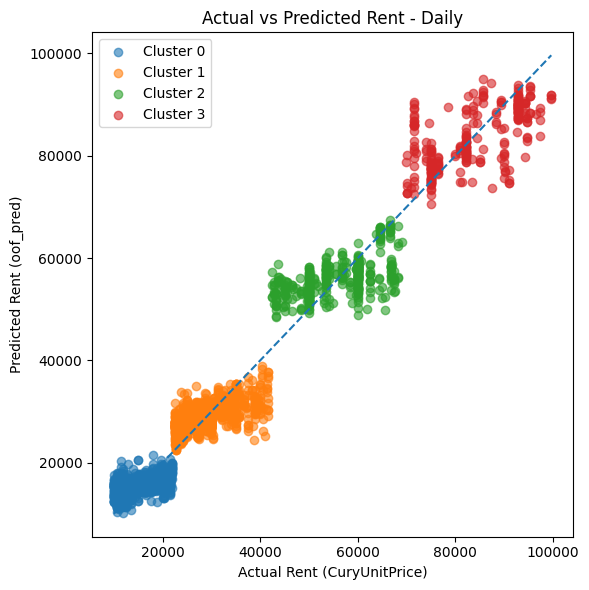


[Monthly] Clusters ditemukan: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Cluster 0: jumlah data = 16
Cluster 1: jumlah data = 1968
Cluster 2: jumlah data = 1378
Cluster 3: jumlah data = 552


C:\Users\HP\AppData\Local\Temp\ipykernel_15600\643887241.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


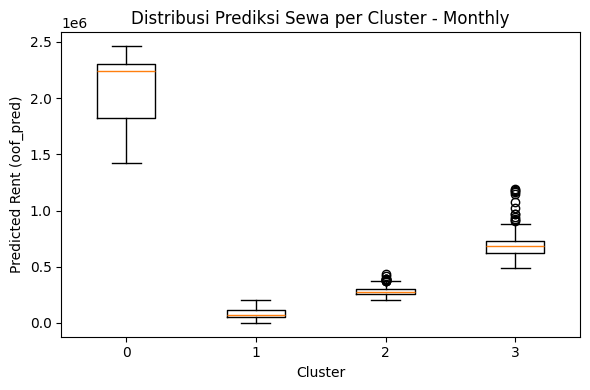


[Daily] Clusters ditemukan: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Cluster 0: jumlah data = 906
Cluster 1: jumlah data = 1162
Cluster 2: jumlah data = 422
Cluster 3: jumlah data = 283


C:\Users\HP\AppData\Local\Temp\ipykernel_15600\643887241.py:81: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


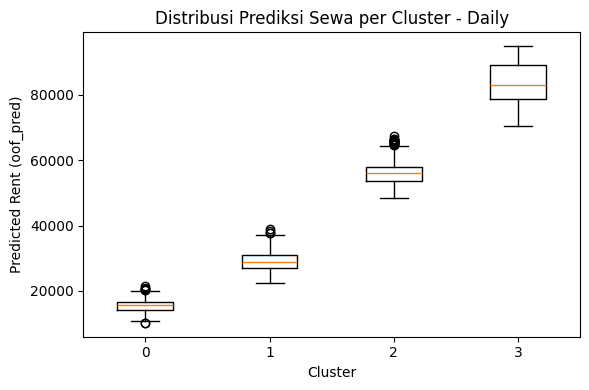

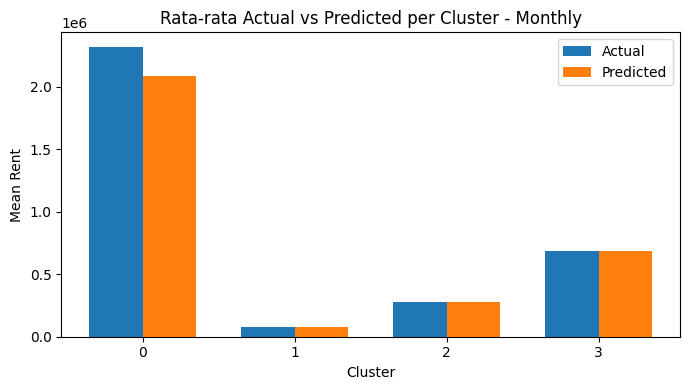

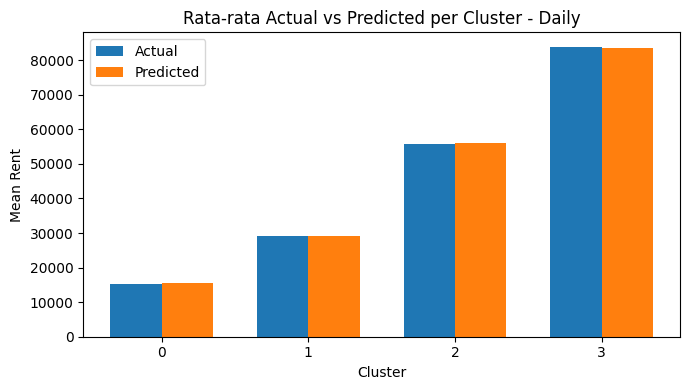


Ringkasan error:
    period     abs_error       ape
0    Daily   3061.184213  0.109544
1  Monthly  34246.078580  0.236825


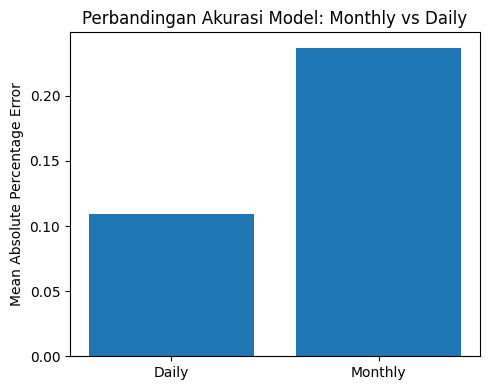

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# -
# 1. BACA DATA
# -
# Sekarang 1 file, 2 sheet: "Monthly" dan "Daily"
oof_path = Path("catboost_oof_pred_with_cluster_kfold_with_macro.xlsx")

df_monthly = pd.read_excel(oof_path, sheet_name="Monthly_OOF")
df_daily   = pd.read_excel(oof_path, sheet_name="Daily_OOF")

# Cek beberapa baris untuk memastikan nama kolom
print("Monthly head:")
print(df_monthly.head())
print("\nDaily head:")
print(df_daily.head())

# Saya anggap kolom-kolomnya:
# 'cluster', 'CuryUnitPrice' (actual), 'Inflation', 'GDP_Growth', 'oof_pred' (prediksi)
actual_col  = "CuryUnitPrice"
pred_col    = "oof_pred"
cluster_col = "cluster"

# Tambahkan kolom periode untuk memudahkan gabungan
df_monthly["period"] = "Monthly"
df_daily["period"]   = "Daily"

# Gabungkan (opsional, untuk beberapa visual)
df_all = pd.concat([df_monthly, df_daily], ignore_index=True)

# -
# 2. SCATTER PLOT ACTUAL vs PREDICTED per PERIODE
# -
def scatter_actual_vs_pred(df, period_label):
    plt.figure(figsize=(6, 6))
    # loop per cluster agar bisa dibedakan di legend
    for cl in sorted(df[cluster_col].dropna().unique()):
        sub = df[df[cluster_col] == cl]
        plt.scatter(sub[actual_col], sub[pred_col], alpha=0.6, label=f"Cluster {cl}")
    # garis y = x sebagai referensi
    lo = min(df[actual_col].min(), df[pred_col].min())
    hi = max(df[actual_col].max(), df[pred_col].max())
    plt.plot([lo, hi], [lo, hi], linestyle="--")
    plt.xlabel("Actual Rent (CuryUnitPrice)")
    plt.ylabel("Predicted Rent (oof_pred)")
    plt.title(f"Actual vs Predicted Rent - {period_label}")
    plt.legend()
    plt.tight_layout()
    plt.show()

scatter_actual_vs_pred(df_monthly, "Monthly")
scatter_actual_vs_pred(df_daily, "Daily")

# -
# 3. BOXPLOT PREDIKSI per CLUSTER per PERIODE
# -
def boxplot_pred_per_cluster(df, period_label):
    # buang baris yang prediksinya NaN
    df = df.dropna(subset=[pred_col]).copy()

    clusters = sorted(df[cluster_col].dropna().unique())
    print(f"\n[{period_label}] Clusters ditemukan:", clusters)

    data = []
    labels = []
    for c in clusters:
        series = df.loc[df[cluster_col] == c, pred_col].dropna()
        print(f"Cluster {c}: jumlah data = {len(series)}")  # debug
        if len(series) > 0:
            data.append(series.values)
            labels.append(str(c))

    if not data:
        print("Semua cluster kosong / NaN, tidak bisa buat boxplot.")
        return

    plt.figure(figsize=(6, 4))
    # catatan: untuk matplotlib, param yang benar adalah 'labels', bukan 'tick_labels'
    plt.boxplot(data, labels=labels, showfliers=True)
    plt.xlabel("Cluster")
    plt.ylabel(f"Predicted Rent ({pred_col})")
    plt.title(f"Distribusi Prediksi Sewa per Cluster - {period_label}")
    plt.tight_layout()
    plt.show()

boxplot_pred_per_cluster(df_monthly, "Monthly")
boxplot_pred_per_cluster(df_daily, "Daily")

# -
# 4. BAR CHART RATA-RATA ACTUAL & PREDIKSI per CLUSTER per PERIODE
# -
def bar_mean_actual_pred_per_cluster(df, period_label):
    grouped = (
        df.groupby(cluster_col)[[actual_col, pred_col]]
        .mean(numeric_only=True)
        .reset_index()
        .sort_values(cluster_col)
    )

    x = range(len(grouped))
    width = 0.35

    plt.figure(figsize=(7, 4))
    plt.bar([i - width/2 for i in x], grouped[actual_col], width=width, label="Actual")
    plt.bar([i + width/2 for i in x], grouped[pred_col],   width=width, label="Predicted")
    plt.xticks(x, grouped[cluster_col].astype(str))
    plt.xlabel("Cluster")
    plt.ylabel("Mean Rent")
    plt.title(f"Rata-rata Actual vs Predicted per Cluster - {period_label}")
    plt.legend()
    plt.tight_layout()
    plt.show()

bar_mean_actual_pred_per_cluster(df_monthly, "Monthly")
bar_mean_actual_pred_per_cluster(df_daily, "Daily")

# -
# 5. BANDINGKAN ERROR ANTARA MONTHLY vs DAILY
# -
for df in (df_monthly, df_daily):
    df["abs_error"] = (df[pred_col] - df[actual_col]).abs()
    df["ape"] = df["abs_error"] / df[actual_col]  # absolute percentage error

# gabungkan SETELAH kolom error dibuat
df_monthly["period"] = "Monthly"
df_daily["period"]   = "Daily"
df_all = pd.concat([df_monthly, df_daily], ignore_index=True)

error_summary = (
    df_all.groupby("period")[["abs_error", "ape"]]
    .mean(numeric_only=True)
    .reset_index()
)

print("\nRingkasan error:")
print(error_summary)

plt.figure(figsize=(5, 4))
plt.bar(error_summary["period"], error_summary["ape"])
plt.ylabel("Mean Absolute Percentage Error")
plt.title("Perbandingan Akurasi Model: Monthly vs Daily")
plt.tight_layout()
plt.show()


## SHAP importance

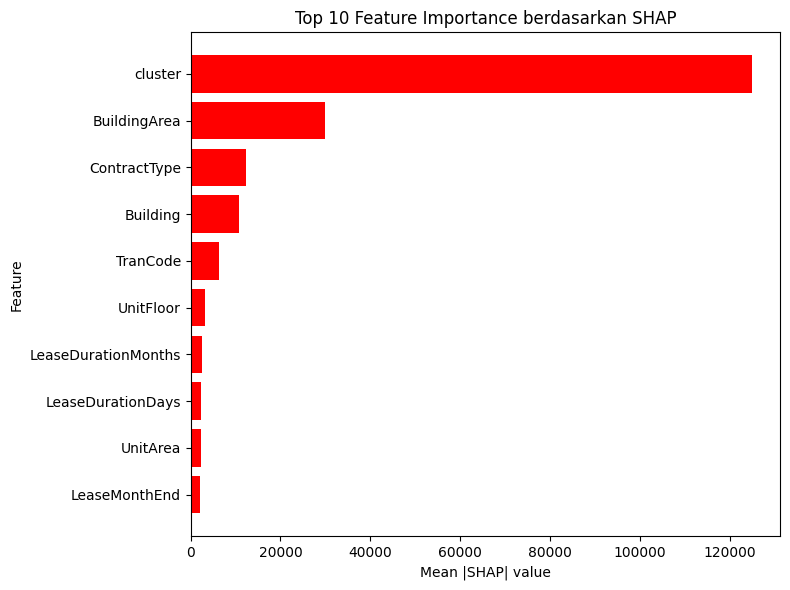

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


# 1. BACA DATA SHAP IMPORTANCE

path_shap = Path("catboost_oof_pred_with_cluster_kfold(visual).xlsx")
df_imp = pd.read_excel(path_shap, sheet_name="Monthly_OOF_SHAP")

# Jika angka memakai format Indonesia (132187,565)
df_imp["mean_abs_shap"] = (
    df_imp["mean_abs_shap"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .astype(float)
)


# 2. PILIH TOP 10 SHAP (sorting DESC)

df_top10 = df_imp.sort_values("mean_abs_shap", ascending=False).head(10)

# Urutkan lagi ASC agar grafik horizontal rapi dari bawah ke atas
df_top10 = df_top10.sort_values("mean_abs_shap", ascending=True)


# 3. GRAFIK BAR HORIZONTAL

plt.figure(figsize=(8, 6))

plt.barh(
    df_top10["feature"],
    df_top10["mean_abs_shap"],
    color="red"
)

plt.xlabel("Mean |SHAP| value")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importance berdasarkan SHAP")
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

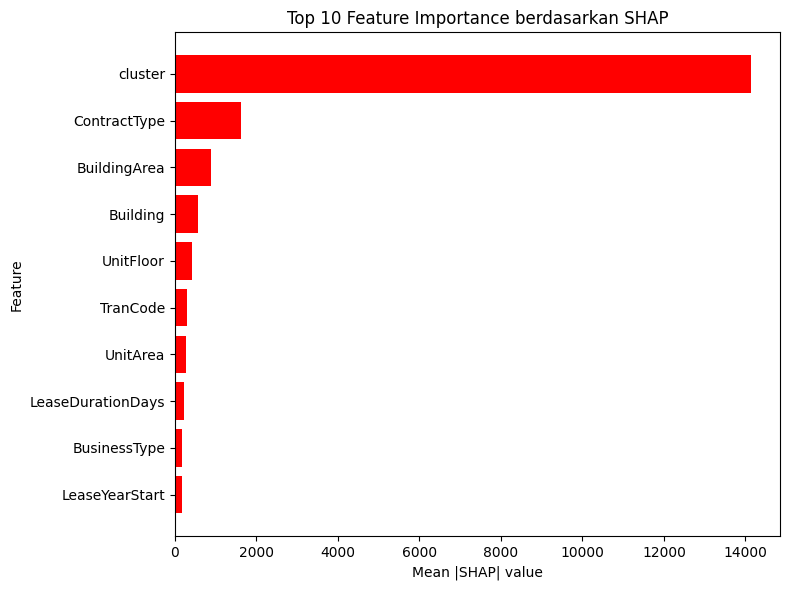

In [ ]:
path_shap = Path("catboost_oof_pred_with_cluster_kfold_with_macro_shap.xlsx")
df_imp = pd.read_excel(path_shap, sheet_name="Daily_OOF_SHAP")

# Jika angka memakai format Indonesia (132187,565)
df_imp["mean_abs_shap"] = (
    df_imp["mean_abs_shap"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .astype(float)
)


# 2. PILIH TOP 10 SHAP (sorting DESC)

df_top10 = df_imp.sort_values("mean_abs_shap", ascending=False).head(10)

# Urutkan lagi ASC agar grafik horizontal rapi dari bawah ke atas
df_top10 = df_top10.sort_values("mean_abs_shap", ascending=True)


# 3. GRAFIK BAR HORIZONTAL

plt.figure(figsize=(8, 6))

plt.barh(
    df_top10["feature"],
    df_top10["mean_abs_shap"],
    color="red"
)

plt.xlabel("Mean |SHAP| value")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importance berdasarkan SHAP")
plt.tight_layout()
plt.show()


## top 5

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

OOF_FILENAME = "catboost_oof_pred_with_cluster_kfold_with_macro.xlsx"

def plot_oof_per_unitid(
    freq_name: str,
    unit_id: str,
    price_col: str = "Price",
    id_col: str = "UnitID",
    date_col: str = "LeaseYearStart",  # diasumsikan berisi TAHUN atau info yang bisa diubah ke tahun
):
    """
    Plot Actual vs Predicted (oof_pred) sebagai SCATTER + garis penghubung,
    hanya ditampilkan tanpa disimpan.
    Jika dalam 1 tahun ada lebih dari 1 input, ambil satu saja (baris terakhir untuk tahun tsb).
    """

    # Tentukan sheet berdasarkan freq
    if freq_name.lower() == "monthly":
        sheet_oof = "Monthly_OOF"
    elif freq_name.lower() == "daily":
        sheet_oof = "Daily_OOF"
    else:
        raise ValueError(f"freq_name '{freq_name}' tidak dikenali. Gunakan 'Monthly' atau 'Daily'.")

    # === 1. Baca data ===
    df = pd.read_excel(OOF_FILENAME, sheet_name=sheet_oof)

    # Validasi kolom
    if id_col not in df.columns:
        raise KeyError(f"Kolom ID '{id_col}' tidak ada. Tersedia: {df.columns.tolist()}")
    if date_col not in df.columns:
        raise KeyError(f"Kolom tanggal/tahun '{date_col}' tidak ada. Tersedia: {df.columns.tolist()}")
    if "oof_pred" not in df.columns:
        raise KeyError(f"Kolom 'oof_pred' tidak ada. Tersedia: {df.columns.tolist()}")

    # Kolom harga fallback
    if price_col not in df.columns:
        cands = [c for c in df.columns if "price" in c.lower()]
        if not cands:
            raise KeyError(f"Kolom harga '{price_col}' tidak ditemukan dan tidak ada kolom mirip 'price'.")
        print(f"[Info] Kolom '{price_col}' tidak ada. Diganti ke '{cands[0]}'")
        price_col = cands[0]

    # === 2. Filter per Unit ===
    df_unit = df[df[id_col] == unit_id].copy()
    if df_unit.empty:
        print(f"Tidak ada data untuk {id_col} = {unit_id}")
        return None

    # === 3. Siapkan kolom tahun ===
    # Asumsi: LeaseYearStart berisi tahun atau sesuatu yang bisa dikonversi ke tahun numerik
    df_unit["year"] = pd.to_numeric(df_unit[date_col], errors="coerce")

    # Buang baris yang tidak punya tahun valid
    df_unit = df_unit.dropna(subset=["year"])
    df_unit["year"] = df_unit["year"].astype(int)

    # Sort berdasar tahun
    df_unit = df_unit.sort_values("year")

    # Konversi nilai numeric
    df_unit["Actual"]    = pd.to_numeric(df_unit[price_col], errors="coerce")
    df_unit["Predicted"] = pd.to_numeric(df_unit["oof_pred"], errors="coerce")

    # === 4. Ambil hanya 1 input per tahun (baris terakhir utk tiap tahun) ===
    df_unit = df_unit.groupby("year").tail(1).sort_values("year")

    # === 5. Plot SCATTER + garis ===
    plt.figure(figsize=(12, 4))

    x = df_unit["year"]

    plt.scatter(x, df_unit["Actual"], s=25, alpha=0.75, label="Actual (points)")
    plt.plot(x, df_unit["Actual"], alpha=0.35, linewidth=1.2)

    plt.scatter(x, df_unit["Predicted"], s=25, alpha=0.75, label="Predicted (points)")
    plt.plot(x, df_unit["Predicted"], alpha=0.35, linewidth=1.2)

    plt.title(f"{freq_name} — {id_col}={unit_id} — Actual vs Predicted (1 point per year)")
    plt.xlabel("Year")
    plt.ylabel(price_col)
    plt.xticks(x)  # supaya tahun muncul sebagai tick utama
    plt.legend()
    plt.tight_layout()

    plt.show()
    return None



=== Plot 5-year UnitID chart untuk Monthly ===
[Info] Kolom 'Price' tidak ada. Diganti ke 'CuryUnitPrice'


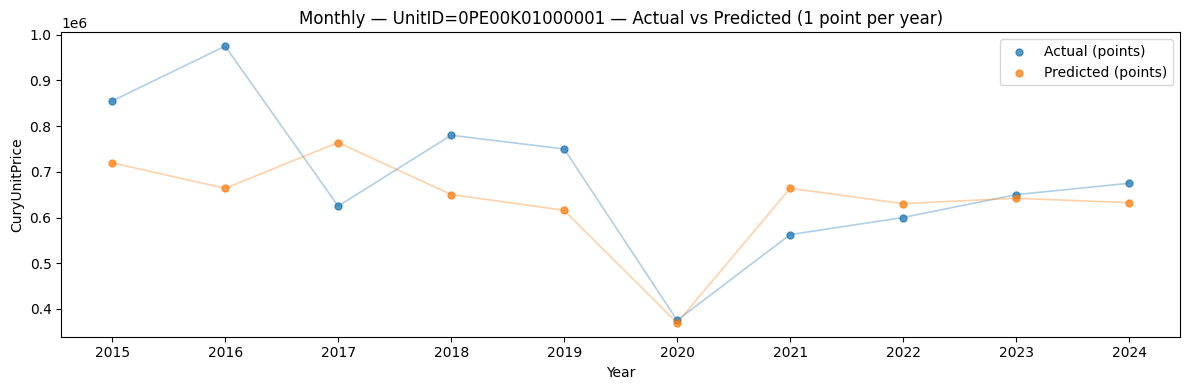

[Info] Kolom 'Price' tidak ada. Diganti ke 'CuryUnitPrice'


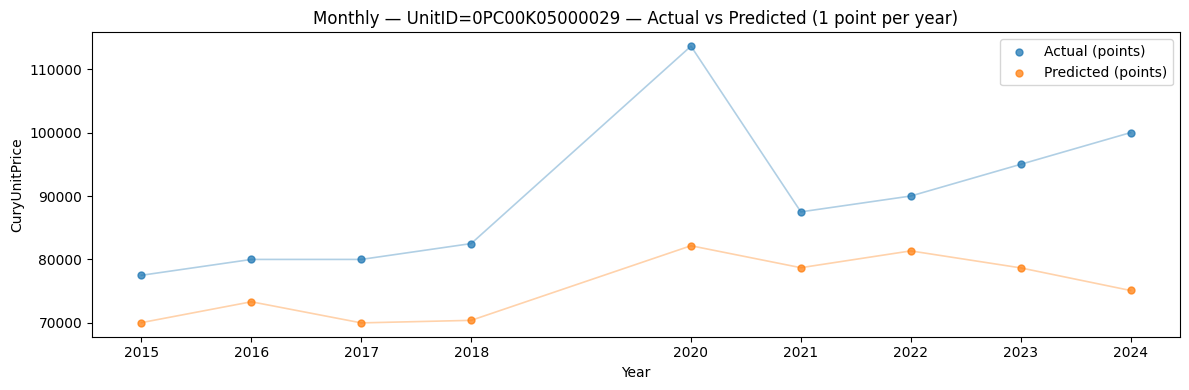

[Info] Kolom 'Price' tidak ada. Diganti ke 'CuryUnitPrice'


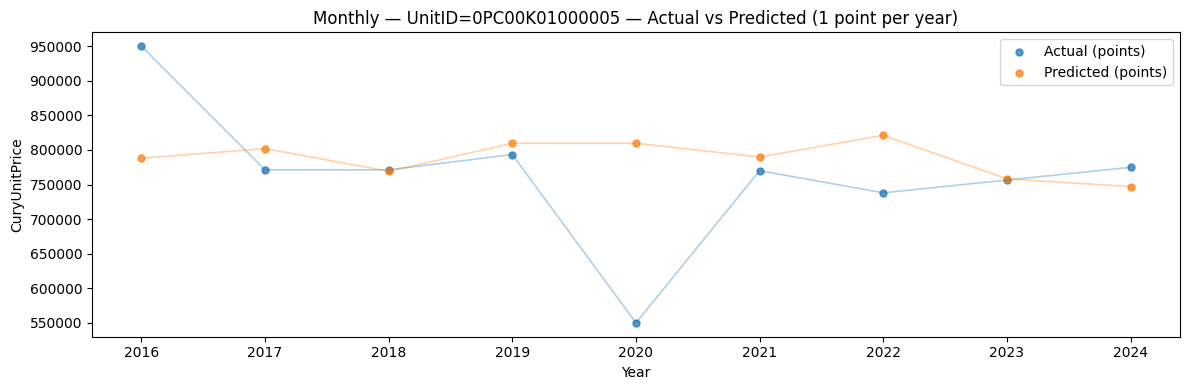

[Info] Kolom 'Price' tidak ada. Diganti ke 'CuryUnitPrice'


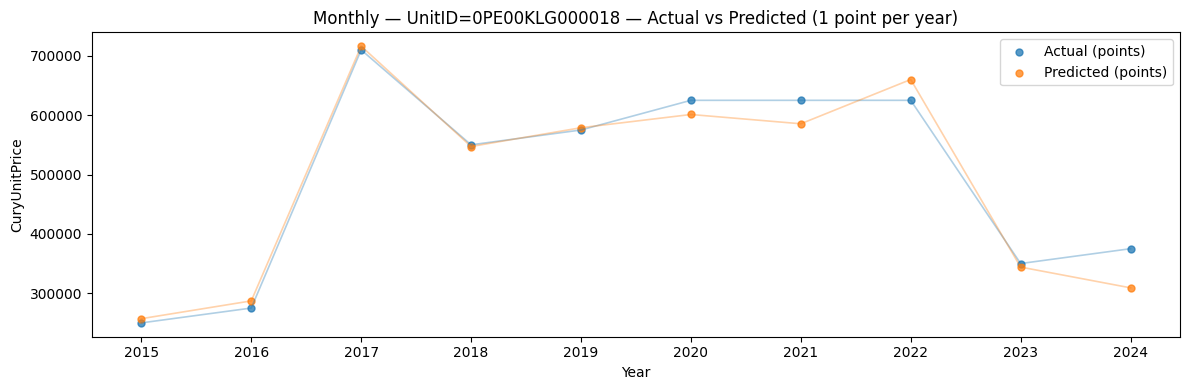


=== Plot 5-year UnitID chart untuk Daily ===
[Info] Kolom 'Price' tidak ada. Diganti ke 'CuryUnitPrice'


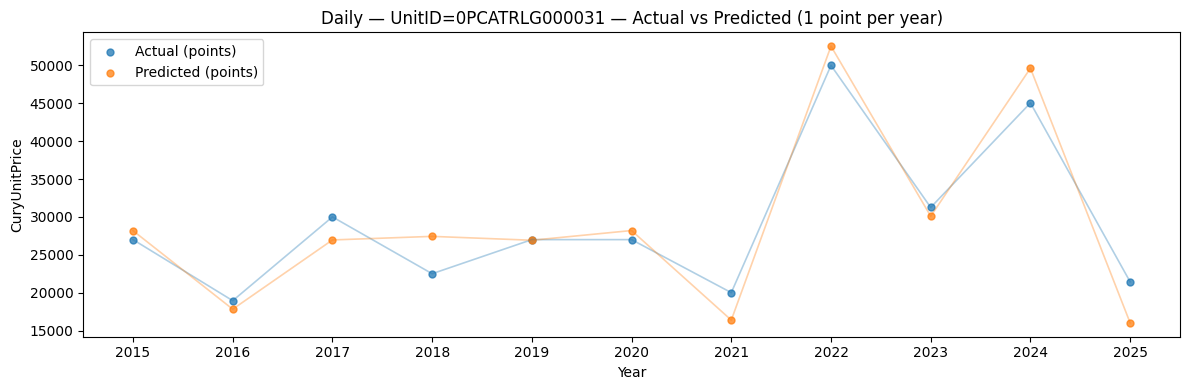

[Info] Kolom 'Price' tidak ada. Diganti ke 'CuryUnitPrice'


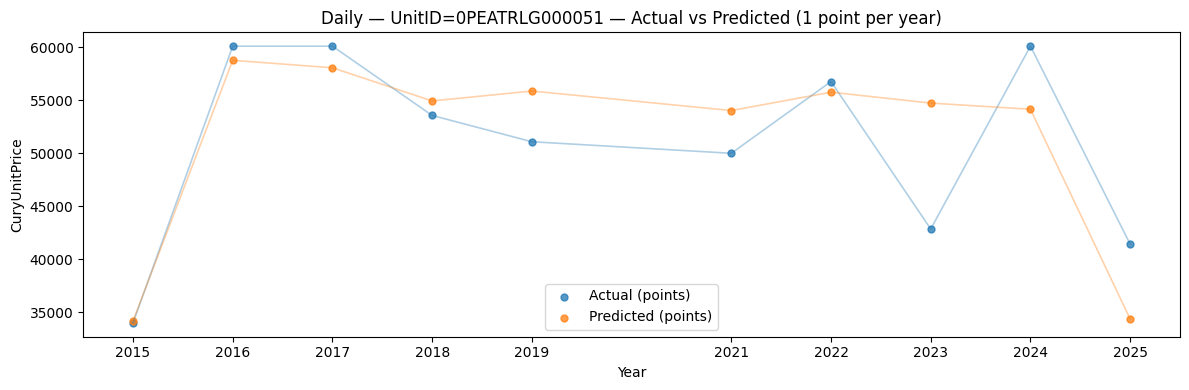

[Info] Kolom 'Price' tidak ada. Diganti ke 'CuryUnitPrice'


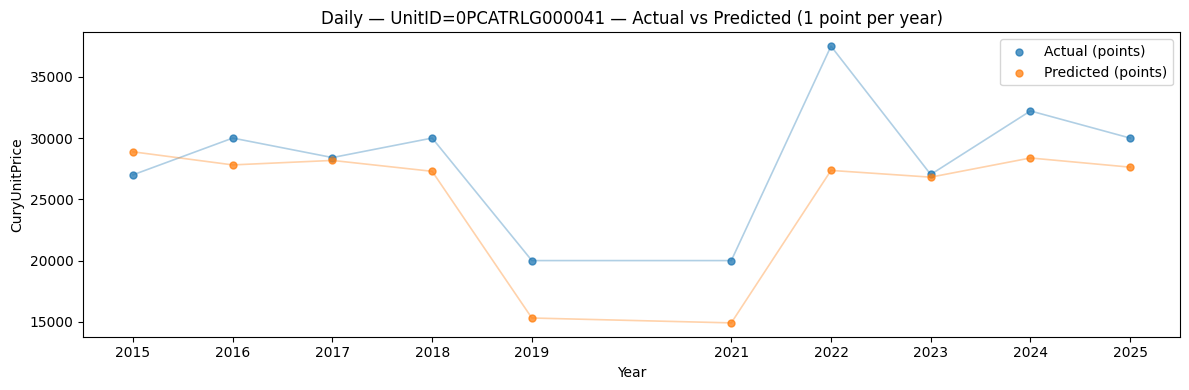

[Info] Kolom 'Price' tidak ada. Diganti ke 'CuryUnitPrice'


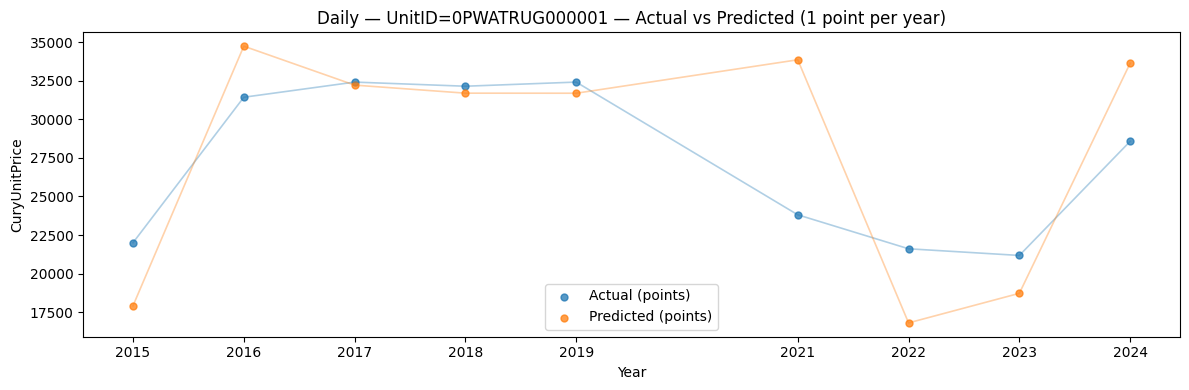

In [37]:
top5_monthly = [
    '0PE00K01000001',
    '0PC00K05000029',
    '0PC00K01000005',
    '0PE00KLG000018'
]

top5_daily = [
    '0PCATRLG000031',
    '0PEATRLG000051',
    '0PCATRLG000041',
    '0PWATRUG000001'
]

# Kalau nama kolom harga beda untuk Monthly/Daily, ganti di sini
PRICE_COLS = {
    "Monthly": "Price",   # ganti kalau perlu
    "Daily": "Price",     # ganti kalau perlu
}

print("\n=== Plot 5-year UnitID chart untuk Monthly ===")
for unitid in top5_monthly:
    plot_oof_per_unitid(
        freq_name="Monthly",
        unit_id=unitid,
        price_col=PRICE_COLS["Monthly"],
    )

print("\n=== Plot 5-year UnitID chart untuk Daily ===")
for unitid in top5_daily:
    plot_oof_per_unitid(
        freq_name="Daily",
        unit_id=unitid,
        price_col=PRICE_COLS["Daily"],
    )
